## Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error




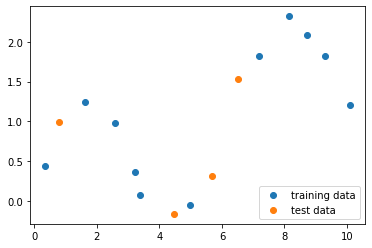

In [56]:
%matplotlib notebook
%matplotlib inline

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 2, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [57]:

def answer_one():

  res = np.zeros((4,100))
  for i, degree in enumerate([2,3,6,9]):
    polynomial = PolynomialFeatures(degree=degree)
    x_polynomial = polynomial.fit_transform(X_train.reshape(X_train.size,1))
    linear_regression = LinearRegression().fit(x_polynomial, y_train)
    y = linear_regression.predict(polynomial.fit_transform(np.linspace(0,10,100).reshape(100,1)))
    res[i,:] = y
  return res
print(answer_one())


[[ 5.38844184e-01  5.38465542e-01  5.38399013e-01  5.38644598e-01
   5.39202297e-01  5.40072109e-01  5.41254034e-01  5.42748073e-01
   5.44554226e-01  5.46672492e-01  5.49102871e-01  5.51845365e-01
   5.54899971e-01  5.58266691e-01  5.61945525e-01  5.65936473e-01
   5.70239533e-01  5.74854708e-01  5.79781996e-01  5.85021397e-01
   5.90572912e-01  5.96436541e-01  6.02612283e-01  6.09100138e-01
   6.15900107e-01  6.23012190e-01  6.30436386e-01  6.38172696e-01
   6.46221119e-01  6.54581656e-01  6.63254307e-01  6.72239070e-01
   6.81535948e-01  6.91144939e-01  7.01066043e-01  7.11299261e-01
   7.21844593e-01  7.32702038e-01  7.43871597e-01  7.55353269e-01
   7.67147055e-01  7.79252954e-01  7.91670967e-01  8.04401093e-01
   8.17443333e-01  8.30797686e-01  8.44464153e-01  8.58442734e-01
   8.72733428e-01  8.87336235e-01  9.02251156e-01  9.17478191e-01
   9.33017339e-01  9.48868601e-01  9.65031976e-01  9.81507465e-01
   9.98295067e-01  1.01539478e+00  1.03280661e+00  1.05053056e+00
   1.06856

### Fitted model plot

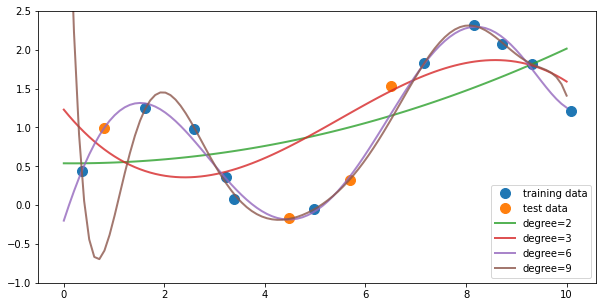

In [58]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines.

**We can see that at degree=6 the model fits the most training and test points, although it seems to provide a similar fit to that of degree=9 but this curve seem to diverge near x=0, and is more computationally exhaustive.**


### Quick note on $R^2$-score:
A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 2 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [59]:
def answer_two():

    # your code here
    r2_train = np.zeros(8)
    r2_test = np.zeros(8)
    for i in range(2,10):
      polynomial = PolynomialFeatures(degree=i)
      x_train_polynomial = polynomial.fit_transform(X_train.reshape(X_train.size,1))
      linear_regression = LinearRegression().fit(x_train_polynomial, y_train)
      y_train_pred = linear_regression.predict(x_train_polynomial)
      r2_train[i-2] = r2_score(y_train, y_train_pred)

      x_test_polynomial = polynomial.fit_transform(X_test.reshape(X_test.size,1))
      y_test_pred = linear_regression.predict(x_test_polynomial)
      r2_test[i-2] = r2_score(y_test, y_test_pred)

    return (r2_train, r2_test)


     # answer here

answer_two()

(array([0.4510998 , 0.58719954, 0.91941945, 0.97578641, 0.99018233,
        0.99352509, 0.99637545, 0.99803706]),
 array([-0.06856984,  0.00533105,  0.73004943,  0.87708301,  0.9214094 ,
         0.92021504,  0.63247948, -0.64525365]))

### Question 3
Plot $R^2$ scores at degrees from 2 to 9.

Based on the $R^2$ scores (degree levels 2 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

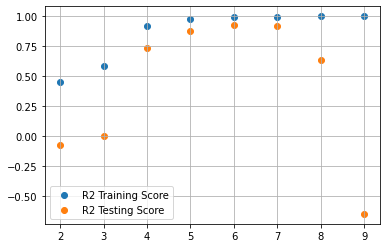

In [60]:
degrees = np.arange(2,10)
tup = answer_two()
r2_train = tup[0]
r2_test = tup[1]
plt.scatter(degrees, r2_train, label='R2 Training Score')
plt.scatter(degrees, r2_test, label='R2 Testing Score')
plt.legend(loc="lower left")
plt.grid()
plt.show()

**Based on the above plot, it is clear that at a degree of 2 the model underfits, while it overfits at a degree of 9. The model would generalize well at a degree of 7.**

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [61]:
def answer_four():

    poly = PolynomialFeatures(degree=12)
    x_train_polynomial = poly.fit_transform(X_train.reshape(X_train.size,1))
    x_test_polynomial = poly.fit_transform(X_test.reshape(X_test.size,1))
    linear_regression = LinearRegression().fit(x_train_polynomial, y_train)
    LinearRegression_R2_test_score = linear_regression.score(x_test_polynomial, y_test)
    linear_lasso = Lasso(alpha=0.01, max_iter = 10000).fit(x_train_polynomial, y_train)
    Lasso_R2_test_score = linear_lasso.score(x_test_polynomial, y_test)
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score) # Your answer here
answer_four()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.311996022859516, 0.8406625614750236)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [62]:
def mse(y_true, y_pred):
    error = 0
    ########### write code here #############
    for i in range(len(y_true)):
      mse = (y_true[i] - y_pred[i]) **2
      error = error + mse
    return error/len(y_true)

implemented_mse= mse([67,50,36,74,84,84,64,34,23,72,62,42],[70,49,38,76,83,80, 67,30,20, 75, 60, 38])
builtin_mse = mean_squared_error([67,50,36,74,84,84,64,34,23,72,62,42],[70,49,38,76,83,80, 67,30,20, 75, 60, 38])
print("Implemented: ", implemented_mse)
print("Sickit-learn: ", builtin_mse)

Implemented:  8.166666666666666
Sickit-learn:  8.166666666666666


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type 


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k 
        $$
    * Then for $b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)} 
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [63]:
import numpy as np

# Linear Regression

class LinearRegression() :
    
    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
        self.type = type

        self.lam = reg_parameter
        
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        
        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = np.random.uniform(0,1)
        # intialize b to 0

        self.b = 0

        

        self.X = X

        
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self
    
    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients
        if self.type == 'linear':
            dW = (2/self.m) * np.dot(self.X.T, Y_pred - self.Y) 
            
        elif self.type == 'ridge':
            dW = (2/self.m) * np.dot(self.X.T, Y_pred - self.Y) + (2 * self.lam * self.W /self.m) 

        else:
            if self.W > 0:
                dW = (2/self.m) * np.dot(self.X.T, Y_pred - self.Y) + (self.lam/self.m) 
            else:
                dW = (2/self.m) * np.dot(self.X.T, Y_pred - self.Y) - (self.lam/self.m) 
        #db is the same for all three types
        db =  (2 / self.m ) * sum(Y_pred - self.Y)

        # update weights
        self.W = self.W - self.learning_rate * dW
        
        self.b = self.b - self.learning_rate * db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        
        y_pred =  np.dot(X, self.W ) + self.b
        return y_pred

### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [64]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

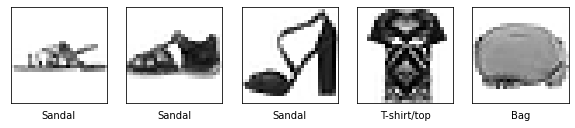

In [66]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [67]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)

In [68]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    values = []
    train_scores = []
    test_scores = []
    ########## write your code here ##############
    for i in range(len(classifiers)):
      values.append(cross_validate(classifiers[i], X, y, return_train_score=True))
    # print(values)
    for val in values:
      train_scores.append(val['train_score'].tolist())
      test_scores.append(val['test_score'].tolist())

    return train_scores,test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [69]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Print train scores and test scores.

In [70]:
print("train scores",train_scores)
print("test scores",test_scores)

train scores [[0.9125, 0.9205357142857142, 0.9208928571428572, 0.9208928571428572, 0.9176785714285715], [0.86375, 0.8657142857142858, 0.8632142857142857, 0.8626785714285714, 0.8682142857142857]]
test scores [[0.835, 0.8007142857142857, 0.82, 0.8142857142857143, 0.8121428571428572], [0.7942857142857143, 0.8228571428571428, 0.7985714285714286, 0.8128571428571428, 0.7992857142857143]]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [71]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

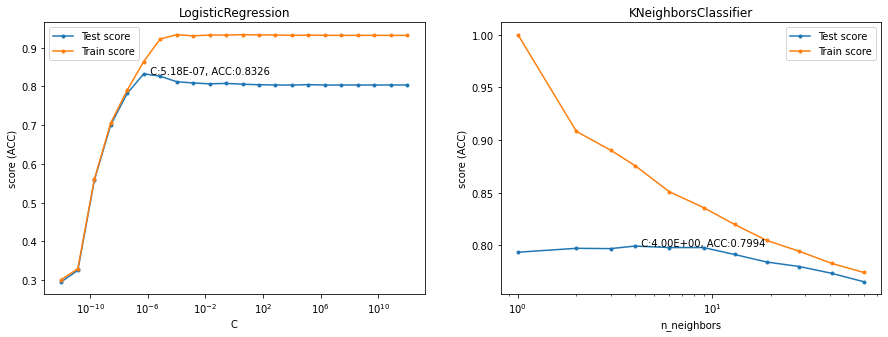

In [73]:
#NOTE: 
#This cell produced a "KeyError: 'Alpha'" as Alpha is not a key in the dict, so I changed it to 'C' as declared above
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    # print("grid search:", grid_search)
    # print("param:", param)
    # print("ax:", ax)

    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

The logistic regression model underfits for small values of alpha, reaches a good fit about alpha=10^-7, then underfits for alpha>=10^-6. The KNN model overfits at small values of n_neighbors, then hits a good fit around n_neighbors = 4, then starts underfitting, although it does not seem to underfit greatly.

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [74]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [75]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [76]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

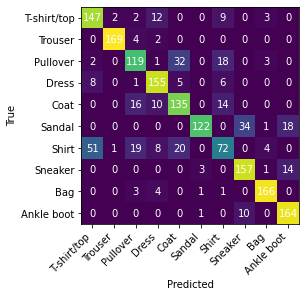

In [77]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [78]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

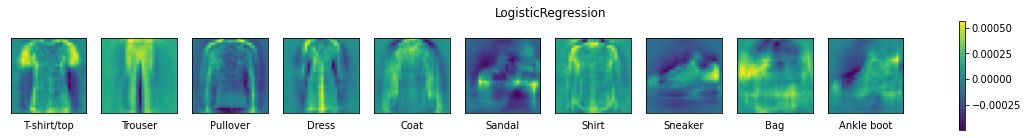

In [79]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model)

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**
One-vs-all models fit the data of one class against the rest, so 10 models are constructed, each of which represents the detection of one class only against the other 9 which are grouped in a single class; hence why we get n-plots per model where n is the number of classes. 

In this dataset, each feature represents a pixel value, so a sneaker for example wouldn't be as tall as a trouser, so the upper pixels' values in the sneakers class are much darker than those in the trousers class which are bright, because these values are distinctive features in this class. So the features chosen for each model do not have equal weights, as some are more indicative of specific classes only, so they are enhanced in those and suppressed in the others. 

In most of the models, the right features are enhanced, for example in the trousers class, the upper (waist) pixels are enhanced, while in the Dress class, the part where trousers would be split to fit the legs is enhanced to differentiate between both.

The model seems to suppress some features in each class, as it doesn't find it distinctive, although some of which we might think are in fact distinctive judging by eyesight; such as the straps or handles in the Bag class, which the model suppresses. It mostly ignores the features it should ignore.

There is an apparent difference in quality between classes, but those with lower quality are the ones typically confused with other classes, such as the Pullover class which has been confused with the Coat class 32 times as seen in the confusion matrix. The classes with the highest qualities are the ones the model predicted correctly most of the times, such as the Trousers class, which has been confused for any another item 6 times only as seen in the confusion matrix.

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. 

In the cell below replace the ####### with your trained models with different alphas.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

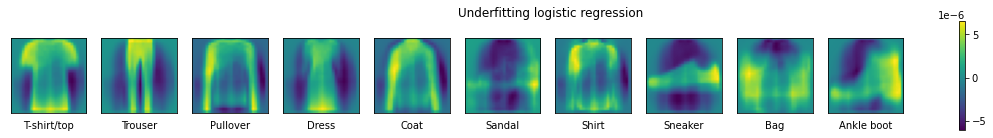

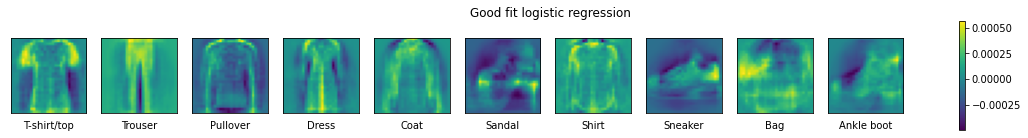

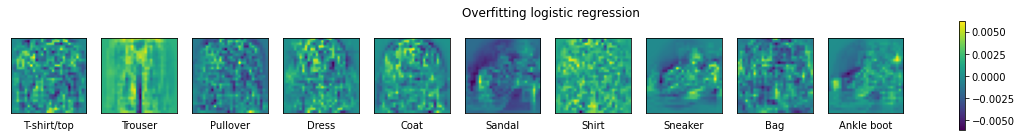

In [80]:
plot_coefficients(LogisticRegression(C=1e-10).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e+6).fit(X_train,y_train),"Overfitting logistic regression")

Interpret and explain the results.
* **Answer:**
In the underfit model, the classes' shapes are maintained, but the models seem to pick up features from each model independently without merging the results to find _distinctive_ features, for example the sleeves of the Pullover and Coat classes have high weights, while they are more suppressed in the good fit models as they are similar and easily confused together. 
In the overfit model, the classes' shapes are highly distorted, as the model allocates high weights to indistinctive pixels in the background which are insignificant in the good fit model. It seems that the model learns each image on its own and kind of memorizes it, with no regard to whether the features it learned is characteristic or not.